In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import uproot

In [3]:
# uproot is python package under scipy colloborations
# It gives you ability to read and write root files and do you analysis with
# python packages which is already rich with other packages

# Here I am trying to follow the tutorial given in:
# https://masonproffitt.github.io/uproot-tutorial/02-files/index.html

In [4]:
# open the root file and assign it to name file
file = uproot.open('uproot-tutorial-file.root')

In [5]:
# see what is this file object
file

<ReadOnlyDirectory '/' at 0x7fd9ba60e310>

In [7]:
# How to list items that contains in the file?
# This however, still doesn't gives us the kinds of objects (i.e. if it contains
# histograms, TTree, etc.)
file.keys()

['Events;1']

In [8]:
# We can further see what objects does this item have in them
file.classnames()

{'Events;1': 'TTree'}

In [9]:
# Accessing contents
# Actual data inside the object
# you can do this, like you would do to access item in an array
file['Events']

<TTree 'Events' (6 branches) at 0x7fd97a492b50>

In [10]:
## TTrees are basically tables of information, TTrees are composed of branches which are like column
# of the table.
tree = file['Events']

In [11]:
# We need to know the names of the branches/columns to see more
tree.keys()

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [13]:
# to get actual data, using arrays()
tree.arrays()

<Array [{nMuon: 2, Muon_pt: [10.8, ... -1, 1]}] type='100000 * {"nMuon": uint32,...'>

In [14]:
branches = tree.arrays()

In [15]:
# now let's access single branch/column
branches['nMuon']

<Array [2, 2, 1, 4, 4, 3, ... 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

In [16]:
branches['Muon_pt']

<Array [[10.8, 15.7], ... 11.4, 3.08, 4.97]] type='100000 * var * float32'>

In [17]:
# if we want to see any particular events
branches['Muon_pt'][0]

<Array [10.8, 15.7] type='2 * float32'>

In [18]:
branches['Muon_pt'][3]

<Array [11.4, 17.6, 9.62, 3.5] type='4 * float32'>

In [20]:
# Q. Print out the pT of all muons that are in only the first 10 events
for i in range(10):
    print(branches['Muon_pt'][i])

[10.8, 15.7]
[10.5, 16.3]
[3.28]
[11.4, 17.6, 9.62, 3.5]
[3.28, 3.64, 32.9, 23.7]
[3.57, 4.57, 4.37]
[57.6, 53]
[11.3, 23.9]
[10.2, 14.2]
[11.5, 3.47]


In [21]:
# what if we want to get all the info of a single event? We ca do so 
branches[0]

<Record ... 0.106], Muon_charge: [-1, -1]} type='{"nMuon": uint32, "Muon_pt": va...'>

In [22]:
# little more please
branches[0].tolist()

{'nMuon': 2,
 'Muon_pt': [10.763696670532227, 15.736522674560547],
 'Muon_eta': [1.0668272972106934, -0.563786506652832],
 'Muon_phi': [-0.03427272289991379, 2.5426154136657715],
 'Muon_mass': [0.10565836727619171, 0.10565836727619171],
 'Muon_charge': [-1, -1]}

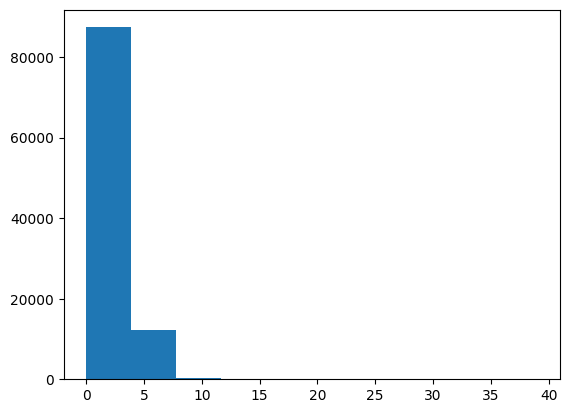

In [24]:
# Histogramming
# let's see how nMuon branch distribution looks like using histogram
plt.hist(branches['nMuon']);

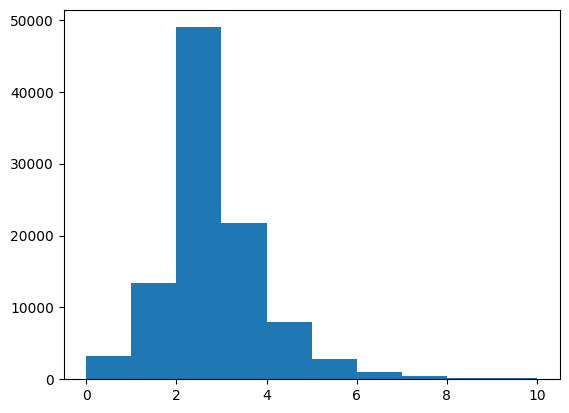

In [25]:
# let's change the binning and ranges
plt.hist(branches['nMuon'], bins=10, range=(0,10))
plt.show()

In [26]:
# let's learn the art of binning, but before we like to learn about
# mean , sd, min, and max of the original distribution
np.mean(branches['nMuon'])

2.35286

In [27]:
np.std(branches['nMuon'])

1.19175912851549

In [28]:
np.min(branches['nMuon'])

0

In [29]:
np.max(branches['nMuon'])

39

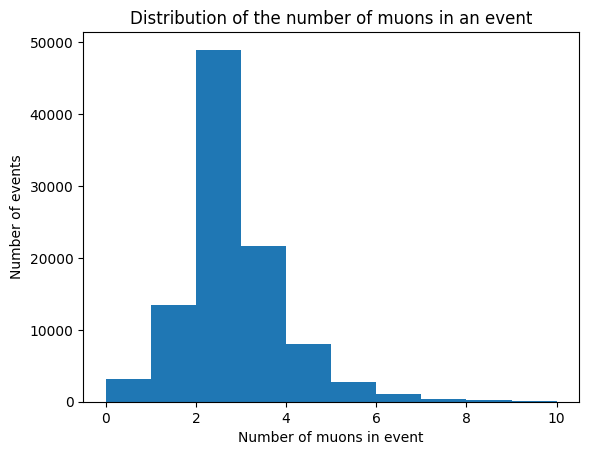

In [30]:
plt.hist(branches['nMuon'], bins=10, range=(0,10))
plt.xlabel('Number of muons in event')
plt.ylabel('Number of events')
plt.title('Distribution of the number of muons in an event')
plt.show()

In [31]:
# up above, the nMuon branch was well-behaved, not jagged, but how about jagged array
# first import awkward array to work on it
import awkward as ak

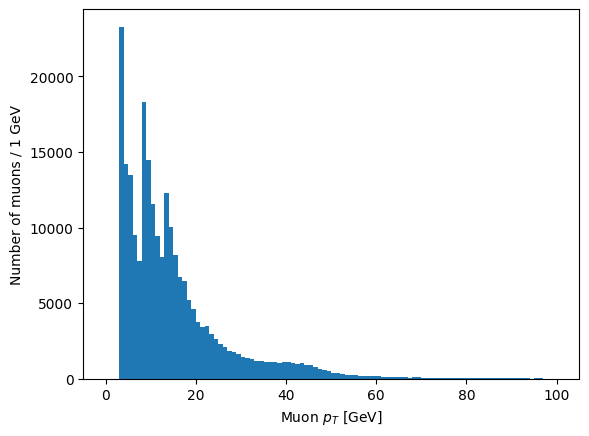

In [32]:
# use ak.flatten() to branches
plt.hist(ak.flatten(branches['Muon_pt']), bins=100, range=(0,100))
plt.xlabel('Muon $p_T$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()

## How to set axis to logarithmic scale?

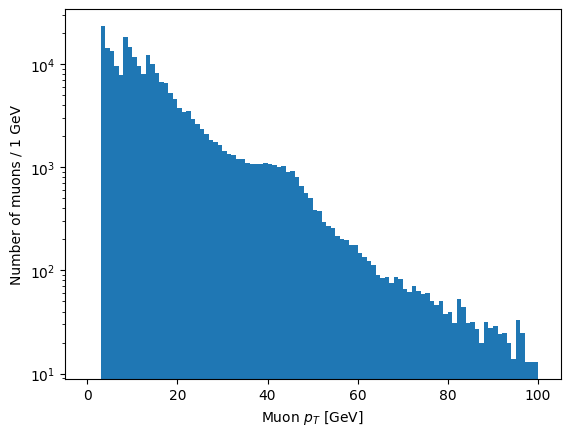

In [33]:
plt.hist(ak.flatten(branches['Muon_pt']), bins=100, range=(0,100))
plt.yscale('log')
plt.xlabel('Muon $p_T$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()

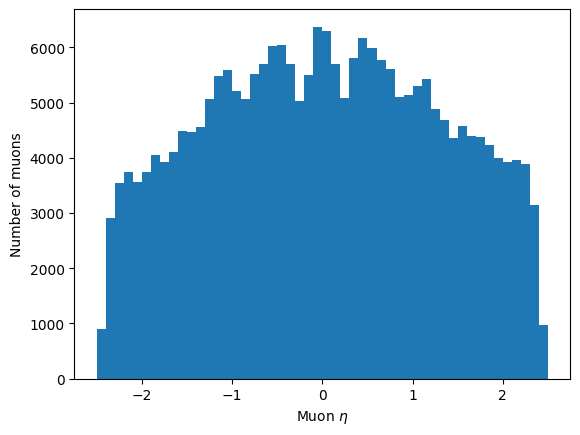

In [35]:
plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()
## playing around with muon eta distributions

In [36]:
# let's count total events number in this file
len(branches['Muon_pt'])

100000

In [37]:
# Note above, it is not the total number of muons, it is total number of rows
# how will you calculate total muons?
np.sum(branches['nMuon'])

235286

In [38]:
# using 'nMuon' branche itself, first flatten the array and count it
len(ak.flatten(branches['Muon_pt']))

235286

In [39]:
# selecting events that passes some criteria
branches['nMuon']==1

<Array [False, False, True, ... False, False] type='100000 * bool'>

In [40]:
# create a mask we can use later/cuts we use later
single_muon_mask = branches['nMuon']==1

In [43]:
# how many events there are of such single muon
np.sum(single_muon_mask)
# sum add True as 1, so adds all True cases in array

13447

## Apply mask now

In [45]:
branches['Muon_pt'][single_muon_mask]

<Array [[3.28], [3.84], ... [13.3], [9.48]] type='13447 * var * float32'>

In [46]:
len(branches['Muon_pt'][single_muon_mask])

13447

In [47]:
# so out of 100,000 events only 13447 has nMuons=1
# and that matches with our mask as well

## Plotting with mask

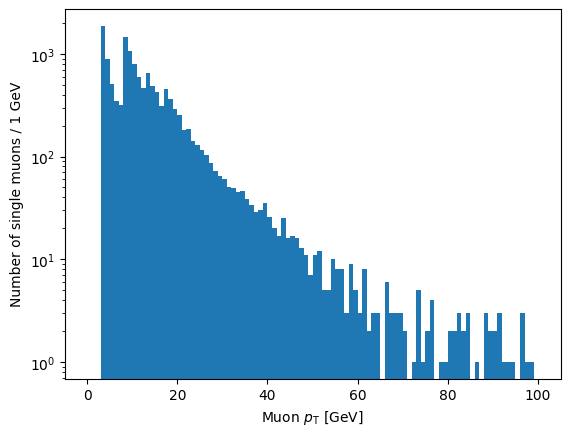

In [48]:
plt.hist(ak.flatten(branches['Muon_pt'][single_muon_mask]), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 1 GeV')
plt.yscale('log')
plt.show()

In [49]:
## using jagged array as mask
eta_mask = abs(branches['Muon_eta'])<2

In [50]:
np.sum(eta_mask)

204564

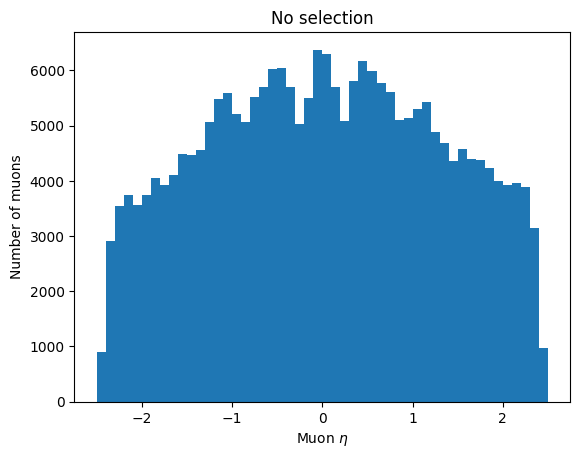

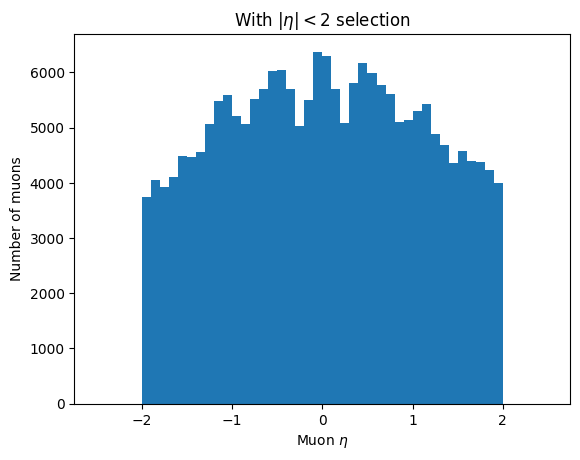

In [51]:
# plotting both without and with cuts

plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.title('No selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

plt.hist(ak.flatten(branches['Muon_eta'][eta_mask]), bins=50, range=(-2.5, 2.5))
plt.title('With $|\eta| < 2$ selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()


In [52]:
# using not or invert the mask
~single_muon_mask

<Array [True, True, False, ... True, True] type='100000 * bool'>

In [53]:
# or even combine masks
single_muon_mask & eta_mask

<Array [[False, False], ... False, False]] type='100000 * var * bool'>

In [54]:
# using or
single_muon_mask | eta_mask

<Array [[True, True], ... True, True, True]] type='100000 * var * bool'>

In [55]:
# be careful to use parenthesis when doing multiple masking
(branches['nMuon'] == 1) & (abs(branches['Muon_eta']) < 2)

<Array [[False, False], ... False, False]] type='100000 * var * bool'>

## Comparing histograms

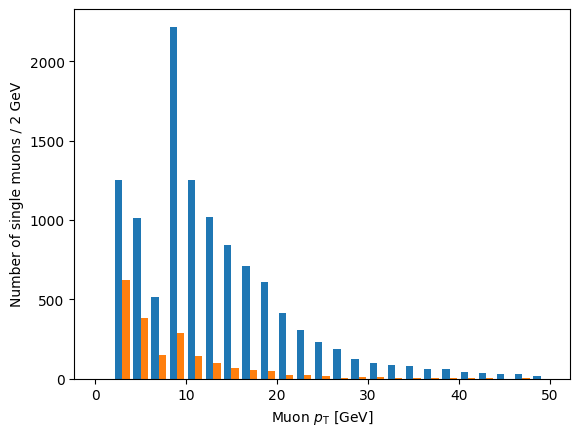

In [57]:
# now that we have several mask, we can compare one histo with another mask.
# hist can take any list of arrays to plot all of them into single canvas
# see how we passed a list of arrays
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.show()

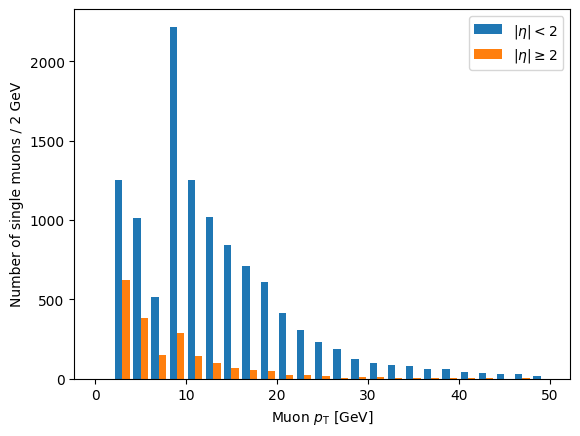

In [58]:
# never forget to put legend, else you won't know which is which
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

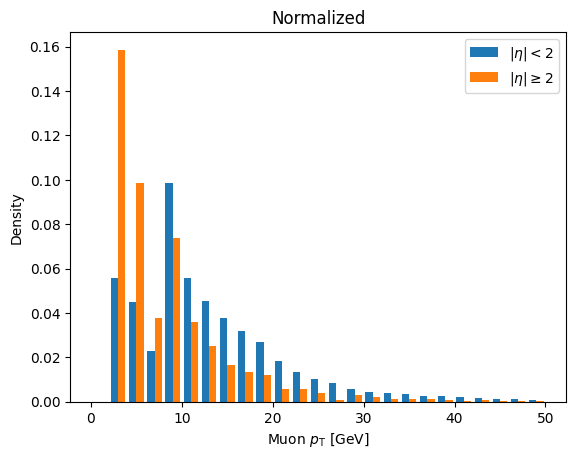

In [60]:
# one problem still here;
# one type of histogram is too small than other
# plot desnity rather than counts, i.e. normalize the integral of each histo to 1
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50), density=True)
plt.title('Normalized')
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Density')
plt.legend()
plt.show()

In [62]:
# Now we can clearly see there’s a significantly higher fraction of muons with 
# abs(eta) >= 2 at lower pT compared to muons with abs(eta) < 2. This makes geometric sense, since muons at 
# higher abs(eta) are traveling in a direction less perpendicular to the beam.

## Physics analysis of getting resonace of dimuons

In [63]:
# first make a mask to select evetns with exactly two muons
two_muons_mask = branches['nMuon']==2

In [65]:
# making four-momentum of all muons in a tree
import vector
muon_p4 = vector.zip({'pt': branches['Muon_pt'], 'eta': branches['Muon_eta'],\
                      'phi': branches['Muon_phi'], 'mass': branches['Muon_mass']})

In [66]:
# filter that don't contain exactly two muons
two_muons_p4 = muon_p4[two_muons_mask]

In [67]:
two_muons_p4

<MomentumArray4D [[{rho: 10.8, ... tau: 0.106}]] type='48976 * var * Momentum4D[...'>

In [71]:
two_muons_p4.E

<Array [[17.5, 18.3], ... [8.82, 17.5]] type='48976 * var * float32'>

In [73]:
# What we want is the invariant mass of the two muons in each of these events. 
# To do that, we need the sum of their four-vectors. 
# First, we pick out the first muon in each event with 2D slice:

In [74]:
first_muon_p4 = two_muons_p4[:, 0]

In [75]:
second_muon_p4 = two_muons_p4[:, 1]

In [77]:
# Another useful feature of these four-vector arrays is being able to compute 
# deltaR (= sqrt(deltaEta^2 + deltaPhi^2)):

In [78]:
first_muon_p4.deltaR(second_muon_p4)

<Array [3.05, 2.92, 3.16, ... 4.47, 3.06, 2.88] type='48976 * float32'>

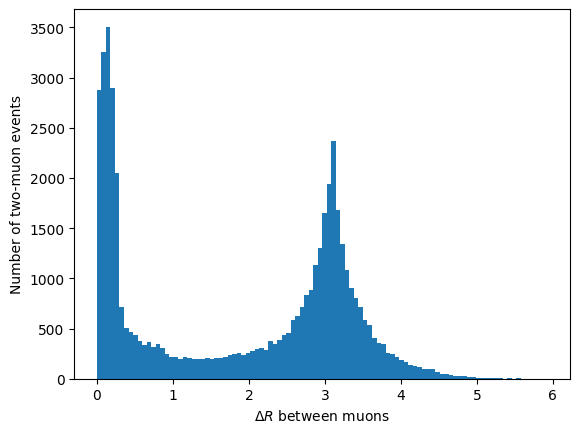

In [79]:
plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=100)
plt.xlabel('$\Delta R$ between muons')
plt.ylabel('Number of two-muon events')
plt.show()

In [80]:
# Adding the four-vectors of the first muon and the second muon for all events is really as easy as:

In [81]:
sum_p4 = first_muon_p4 + second_muon_p4
sum_p4

<MomentumArray4D [{rho: 8.79, phi: 1.83, ... tau: 16.5}] type='48976 * Momentum4...'>

In [82]:
# The last thing we need to do before we’re ready to plot the spectrum is 
# to select only pairs with opposite charges:

In [83]:
two_muons_charges = branches['Muon_charge'][two_muons_mask]
opposite_sign_muons_mask = two_muons_charges[:,0] != two_muons_charges[:, 1]

In [84]:
dimuon_p4 = sum_p4[opposite_sign_muons_mask]

In [85]:
# Plot a histogram of the dimuon invariant mass on a log-log plot. Try to find all resonances (there are at least 7 visible). 
# How many dimuon events are there?

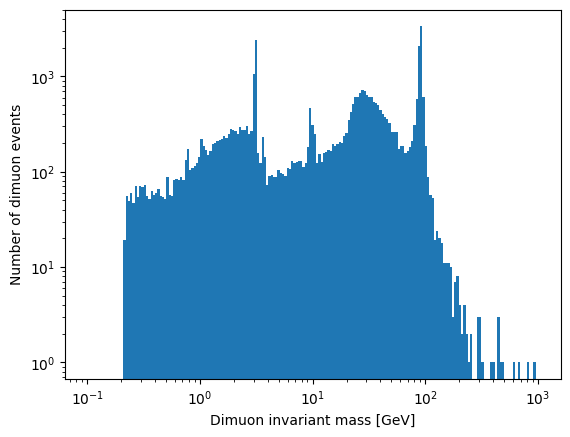

In [89]:
plt.hist(dimuon_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [90]:
len(dimuon_p4)

37183

## Fitting

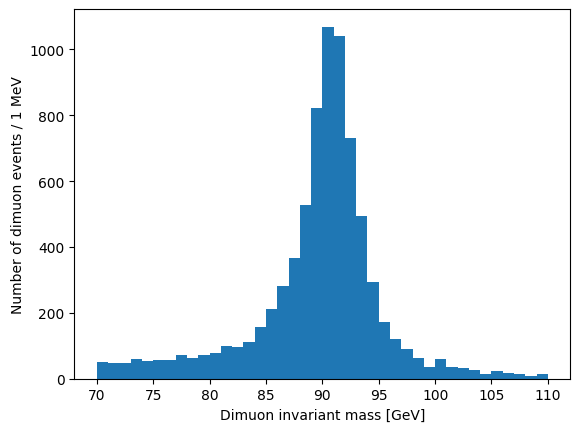

In [91]:
# focus of Z resonance
plt.hist(dimuon_p4.mass, bins=40, range=(70, 110))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.show()

In [92]:
# Resonances are described by the relativistic Breit-Wigner distribution.
# We should be able to fit one to this peak:

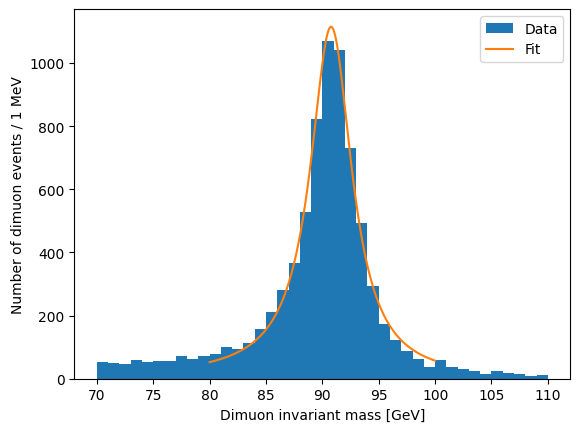

In [94]:
from scipy.optimize import curve_fit

def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

bin_contents, bin_edges = np.histogram(dimuon_p4.mass.to_numpy(), bins=20, range=(80, 100))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[90, 10, 1000], sigma=np.sqrt(bin_contents))

plt.hist(dimuon_p4.mass, bins=40, range=(70, 110), label='Data')
x = np.linspace(80, 100, 200)
y = relativistic_breit_wigner(x, *popt)
plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.legend()
plt.show()
